# 주성분 분석(PCA : Principal Component Analysis)
- 다차원의 데이터를 소차원의 데이터로 환원시키는 기법

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
import numpy as np

fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

In [34]:
# 2차원 배열로 변경하기
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

# PCA 모델 구성하기

In [35]:
from sklearn.decomposition import PCA

pca =PCA(n_components=50) # 300개의 데이터중 구별이확실한 주성분 50개 선택 (Feature들 중 특징을 포함하여 구성한다.)
pca.fit(fruits_2d)

PCA(n_components=50)

In [36]:
# 축소된 차원 크기 확인하기
pca.components_.shape

(50, 10000)

In [37]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) #n은 샘플 갯수
    # 한 줄에 10개씩 이미지 그리기. 샘플갯수를 10으로 나누어 전체 행 갯수를 계산
    rows = int(np.ceil(n/10)) # 올림처리
    # 행이 1개면 열 갯수가 샘플 갯수이고 그렇지 않으면 10개
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio),squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n : #n개 까지만 그린다
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

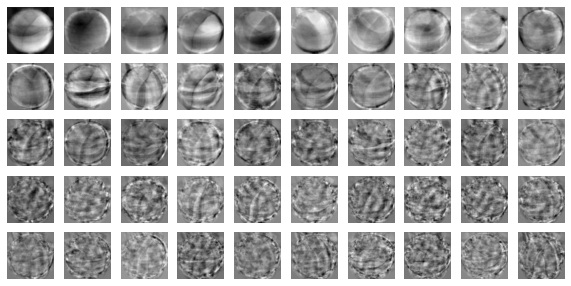

In [38]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 각 컬럼에 대한 특징이 보인다. 자세히 보면 바나나, 파인애플, 사과가 보인다.

In [39]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruits_2d.shape) # 원본크기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 줄였다.

(300, 10000)
(300, 50)


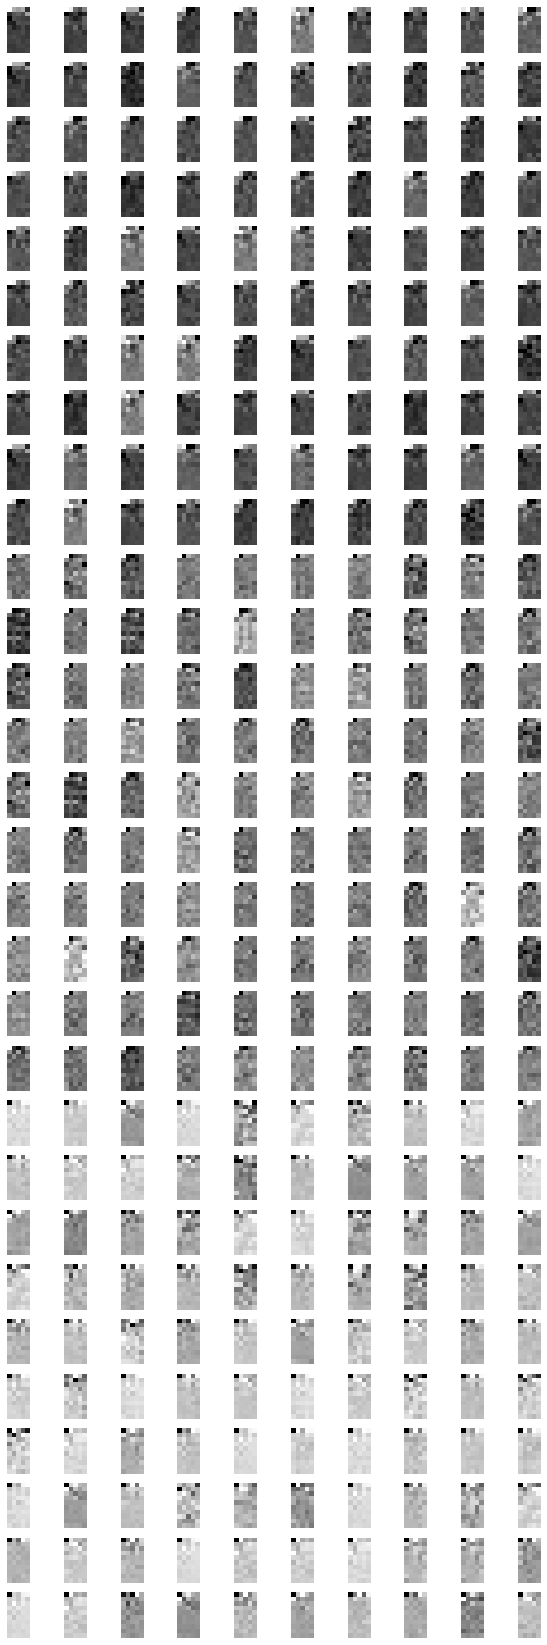

In [40]:
draw_fruits(fruits_pca.reshape(-1, 10, 5))
# 10, 5)의 10과5는 (300, 50)의 50은 곱해서 나오기만 하면된다.
# 나중에 딥러닝가면 CNN이라고 한다.

---
# 원본 데이터 재구성


: 인코딩한 것을 다시 코딩하기

In [41]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape) # 다시 바꿨음

(300, 10000)


In [42]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
fruits_reconstruct.shape

(300, 100, 100)

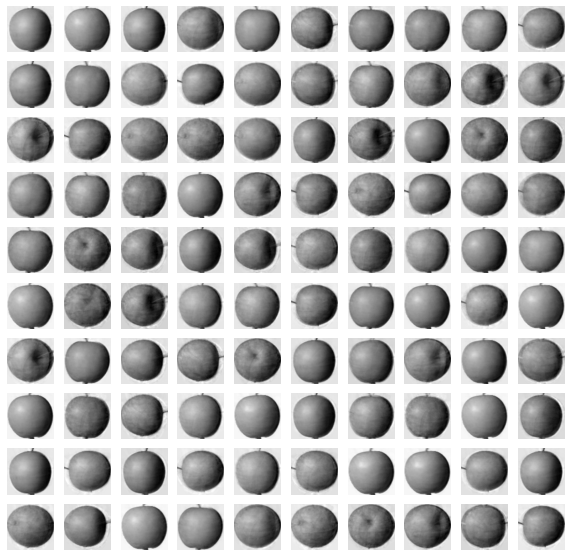

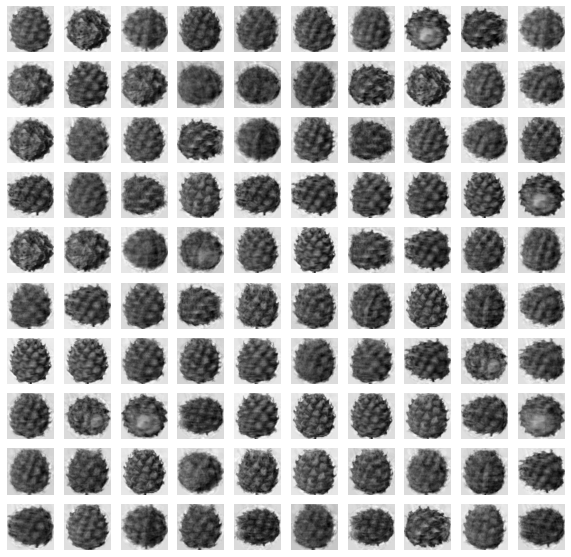

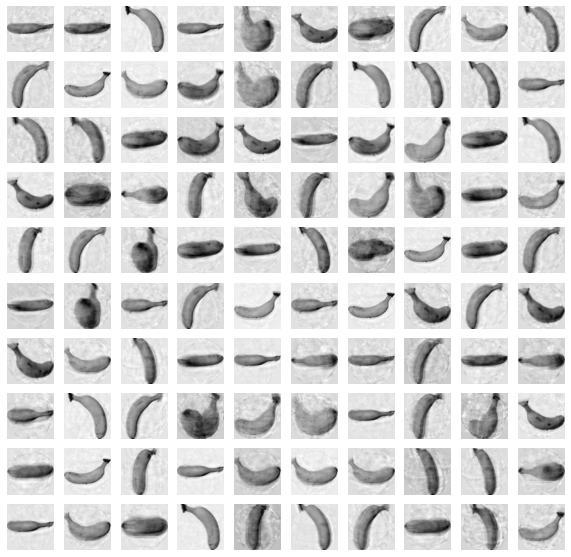

In [44]:
for start in [0, 100, 200]:  # [사과,파인애플,바나나]
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

> 1/200의 데이터 특성만 가지고도 전반적으로 배경을 깨끗하지 않으나 물체의 구분은 가능하다.

---
# 설명된 분산
: 주성분으로 구성할때 원본 데이터의 분산을 어느정도 유지하고 있었는지 확인하는 방법 

In [45]:
np.sum(pca.explained_variance_ratio_) # 50개의 주성분 데이터

0.9223308868726044

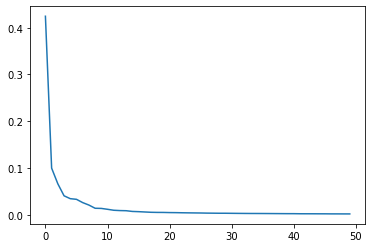

In [46]:
# 그래프 그리기
plt.plot(pca.explained_variance_ratio_)
plt.show()
# y축에 오차율의미, 0.0이 100%의미

> 10개 정도만 주성분을 잡아도 문제 없을 것 같아 보인다.

---
# 로지스틱 회귀분석에 주성분 분석을 대입하여 사용해보기

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [48]:
# 로지스틱 회귀부넉 자도학습이므로 Target이 필요하다.
target = np.array([0]*100+[1]*100+[2]*100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
# 교차검증 실시
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.4264711856842041


> 정확도는 99.7% 정도 이며, 계산에 필요한 시간은 0.4초 정도 나왔다.

In [53]:
# 300 * 50로 구성된주성분 분석르호 구성된 데이터로 확인
scores = cross_validate(lr,fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.0389620304107666


> 정확도는 100% 정도 이며 계산에 필요한 시간은 0.03초 이다.

In [54]:
scores

{'fit_time': array([0.07774329, 0.03665709, 0.02352595, 0.02199006, 0.03489375]),
 'score_time': array([0.00094104, 0.00029922, 0.00029302, 0.00032592, 0.00030422]),
 'test_score': array([1., 1., 1., 1., 1.])}

---
# 주성분 분석의 분산의 크기를 정해 사용하기

In [55]:
pca = PCA(n_components=0.5) # n_components를 실수를 정하면 분산의 percentage로 나타낸다.
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [58]:
print(pca.n_components_)

2


> 필요한 주성분 Feature를 2개로 사용   
> 주성분 2개면 그래프로 표현이 가능하다.

In [59]:
fruits_pca =pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [60]:
# 교차검증으로 확인
scores = cross_validate(lr,fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04596147537231445


> 정확도는 99.3% 이며 계산 시간은 0.04초 이다.

In [61]:
# 주성분의 값을 알아보자
pcaComponents = pca.fit_transform(fruits_2d)

# 데이터 프레임 구성
import pandas as pd
pcaDf = pd.DataFrame(data=pcaComponents, columns=['PCA1','PCA2'])
pcaDf.head()

,PCA1,PCA2
0,-2776.498471,-1580.322486
1,-3075.909684,-2734.476728
2,-2616.828977,-1496.477291
3,-3113.625578,-2527.080543
4,-2519.267133,-2323.854018


---
# K-Means에 주성분 분석 적용해 보기

In [62]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca) # 컬럼 1000가 아닌 2개이다. 2개로도 만들 수 있다.

KMeans(n_clusters=3, random_state=42)

In [64]:
# 군집 갯수와 빈도수 확인하기
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

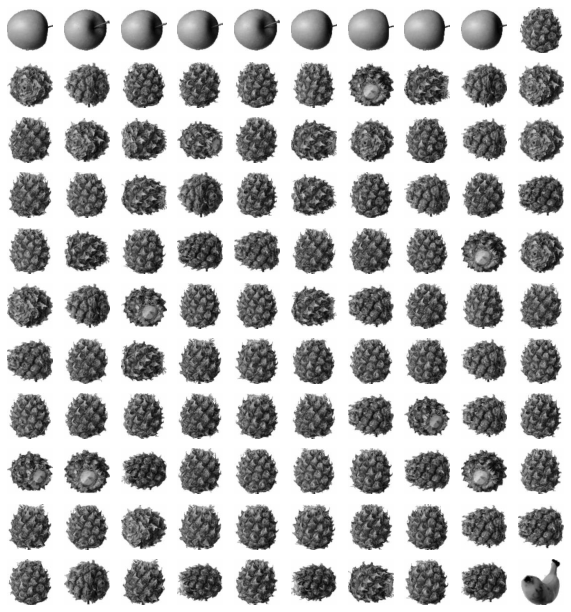

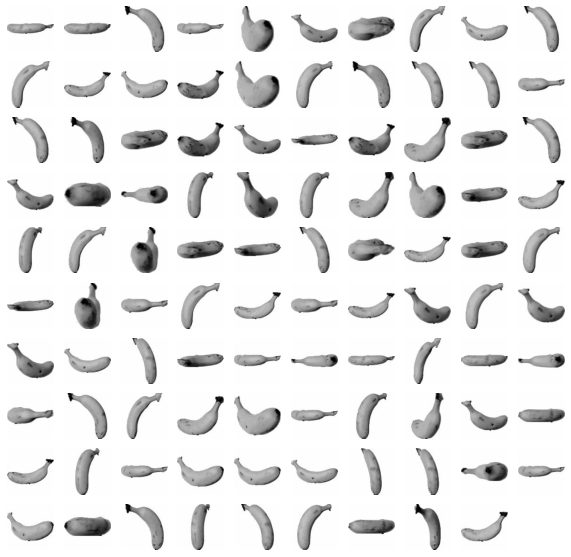

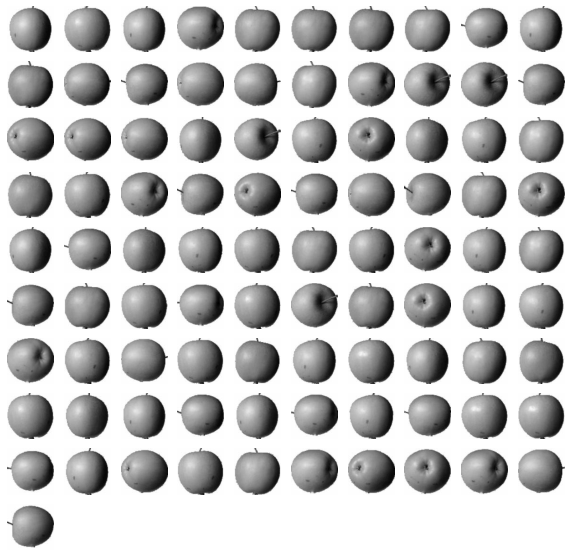

In [65]:
# 그림으로 확인하기
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

---
# 산점도로 확인해보기

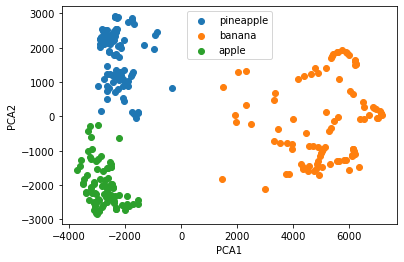

In [68]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

---
# 주성분 50개 했을때 연습 ------------------

---

# 주성분을 10개만 정의해서 해보자

In [18]:
pca =PCA(n_components=10) # 300개의 데이터중 구별이확실한 주성분 10개 선택 (Feature들 중 특징을 포함하여 구성한다.)
pca.fit(fruits_2d)

PCA(n_components=10)

In [19]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) #n은 샘플 갯수
    # 한 줄에 10개씩 이미지 그리기. 샘플갯수를 10으로 나누어 전체 행 갯수를 계산
    rows = int(np.ceil(n/10)) # 올림처리
    # 행이 1개면 열 갯수가 샘플 갯수이고 그렇지 않으면 10개
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio),squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n : #n개 까지만 그린다
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

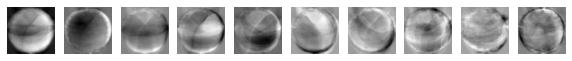

In [20]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [21]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruits_2d.shape) # 원본크기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 줄였다.

(300, 10000)
(300, 10)


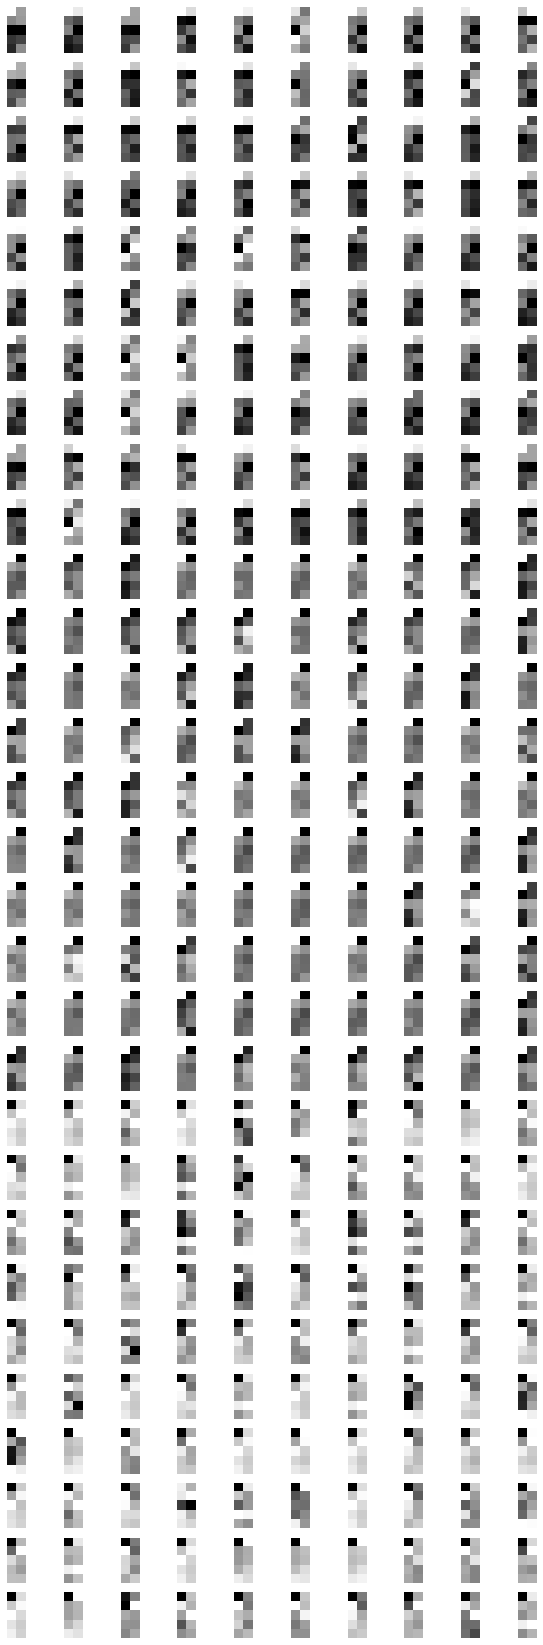

In [26]:
draw_fruits(fruits_pca.reshape(-1, 5, 2))

In [27]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape) # 다시 바꿨음

(300, 10000)


In [28]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
fruits_reconstruct.shape

(300, 100, 100)

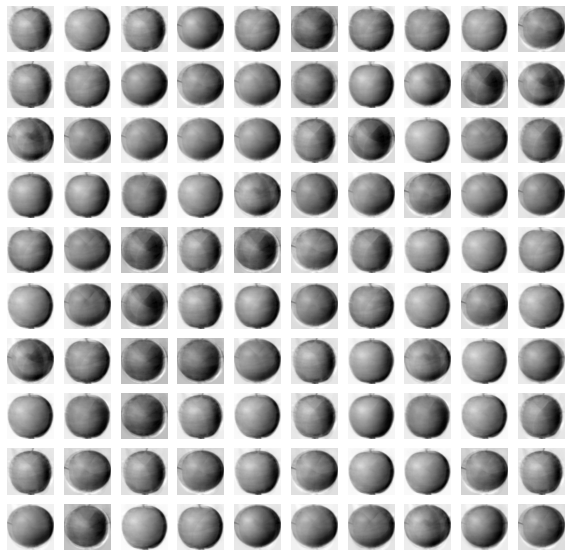

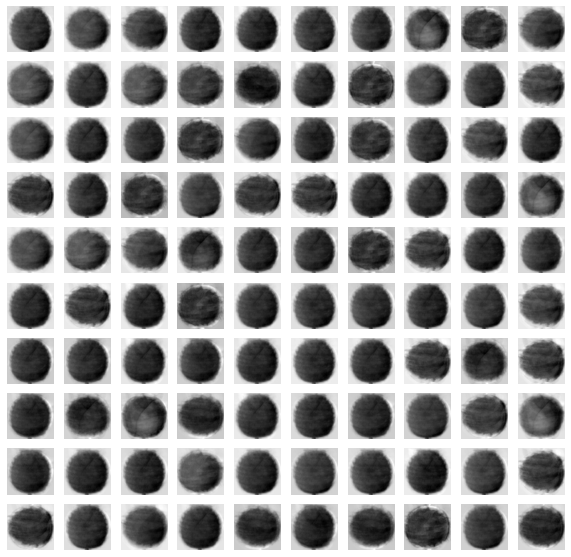

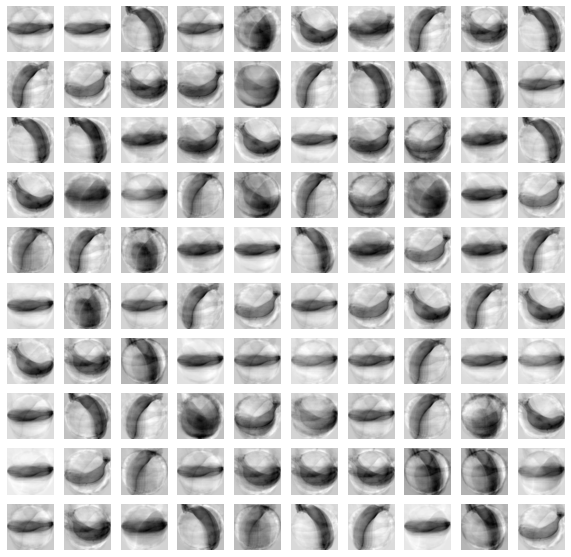

In [29]:
for start in [0, 100, 200]:  # [사과,파인애플,바나나]
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [30]:
np.sum(pca.explained_variance_ratio_) # 10개의 주성분 데이터

0.7711095971667487

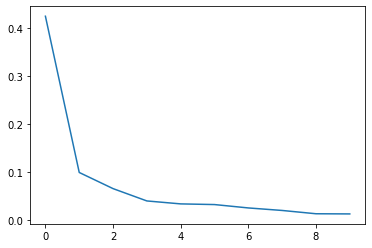

In [31]:
# 그래프 그리기
plt.plot(pca.explained_variance_ratio_)
plt.show()
# y축에 오차율의미, 0.0이 100%의미